In [1]:
# pyファイルに変換
!jupyter nbconvert --to script /home/yamamoto/workspace/research/edtmsr/data_visualize.ipynb
import xml.etree.ElementTree as ET
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy
import pprint

[NbConvertApp] Converting notebook /home/yamamoto/workspace/research/edtmsr/data_visualize.ipynb to script
[NbConvertApp] Writing 6123 bytes to /home/yamamoto/workspace/research/edtmsr/data_visualize.py


本研究で使用するデータセットのトポロジを取得 \
隣接行列とグラフ構造で表現

In [2]:
import xml.etree.ElementTree as ET
import numpy as np
import pandas as pd

# Parse the XML file
tree = ET.parse('/home/yamamoto/workspace/research/edtmsr/origin_data/topology-anonymised.xml')
root = tree.getroot()

# Adjust the XML parsing and adjacency matrix generation with additional checks
nodes = {}
index = 0

# Create a mapping for node IDs to indices
for node in root.findall('.//node'):
    node_id = node.get('id')
    if node_id not in nodes:
        nodes[node_id] = index
        index += 1

# Create adjacency matrix
num_nodes = len(nodes)
adj_matrix = np.zeros((num_nodes, num_nodes), dtype=int)

# Fill adjacency matrix with links
for link in root.findall('.//link'):
    source_element = link.find('./from')
    target_element = link.find('./to')
    if source_element is not None and target_element is not None:
        source = source_element.get('node')
        target = target_element.get('node')
        if source in nodes and target in nodes:
            adj_matrix[nodes[source], nodes[target]] = 1
            adj_matrix[nodes[target], nodes[source]] = 1  # Assuming undirected links

# Sort nodes by numerical order and rearrange the adjacency matrix accordingly
sorted_node_ids = sorted(nodes.keys(), key=int)
sorted_indices = [nodes[node_id] for node_id in sorted_node_ids]
adj_matrix_sorted = adj_matrix[np.ix_(sorted_indices, sorted_indices)]

# Convert the sorted adjacency matrix to a DataFrame for better readability
adj_matrix_sorted_df = pd.DataFrame(adj_matrix_sorted, index=sorted_node_ids, columns=sorted_node_ids)

# Display the sorted adjacency matrix as a DataFrame
adj_matrix_sorted_df

# dfをアレイに変換
adj_matrix_sorted_array = adj_matrix_sorted_df.values
print(adj_matrix_sorted_array)

[[0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0]
 [0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0]
 [0 0 1 0 0 0 1 0 0 

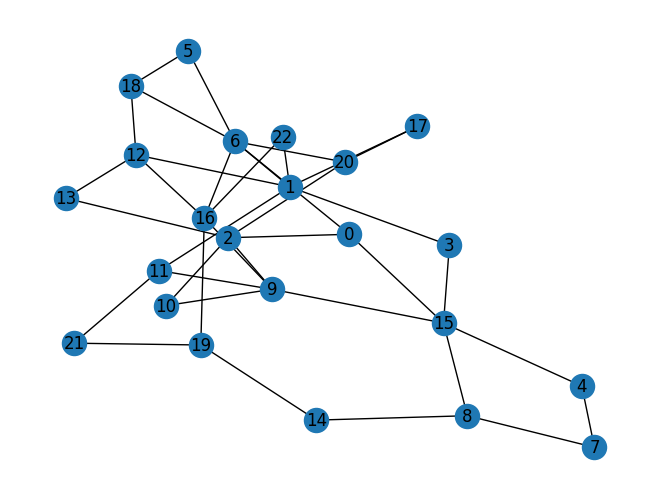

In [3]:
# 隣接行列からグラフを作成
G = nx.from_numpy_array(adj_matrix_sorted_array)
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True)
plt.show()

In [4]:
# # グラフの作成
# G = nx.Graph()
# G.add_edges_from(edges)

# # グラフの描画
# plt.figure(figsize=(12, 8))
# pos = nx.spring_layout(G, seed=12)  # ノードのレイアウト
# nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=3000, font_size=12, font_weight='bold')
# plt.title('Network Graph')
# plt.show()

In [5]:
# 繋がってるノードだけを表示
print(G[21])

{11: {'weight': 1}, 19: {'weight': 1}}


In [6]:
import xml.etree.ElementTree as ET
import pandas as pd
import pprint

# Parse the XML file
tree = ET.parse('/home/yamamoto/workspace/research/edtmsr/origin_data/traffic-matrices/IntraTM-2005-01-01-00-30.xml')
root = tree.getroot()

# Initialize an empty list to hold the traffic data
traffic_data = []

# Extract traffic data based on the observed structure
for src_node in root.findall('.//src'):
    source = src_node.get('id')
    for dst_node in src_node.findall('dst'):
        destination = dst_node.get('id')
        traffic = float(dst_node.text)
        traffic_data.append([source, destination, traffic])

# Convert the traffic data to a pandas DataFrame
traffic_df = pd.DataFrame(traffic_data, columns=['Source', 'Destination', 'Traffic'])

# Convert the traffic data to a pandas DataFrame
traffic_df = pd.DataFrame(traffic_data, columns=['Source', 'Destination', 'Traffic'])

# Get unique sources and destinations
sources = set(traffic_df['Source'])
destinations = set(traffic_df['Destination'])
all_nodes = sorted(sources.union(destinations), key=int)

# Create a pivot table to represent the traffic matrix
traffic_matrix = traffic_df.pivot(index='Source', columns='Destination', values='Traffic').reindex(index=all_nodes, columns=all_nodes).fillna(0)

# Display the sorted traffic matrix
traffic_matrix_sorted = traffic_matrix.loc[all_nodes, all_nodes]
# print(traffic_matrix_sorted)

# dfをアレイに変換
adj_matrix_sorted_array = traffic_matrix_sorted.values
print(adj_matrix_sorted_array.shape)

# dfをtensorに変換
# traffic_matrix_tensor = traffic_matrix_sorted.values
# traffic_matrix_tensor = traffic_matrix_tensor.reshape(1, traffic_matrix_tensor.shape[0], traffic_matrix_tensor.shape[1])


# csvに保存
traffic_matrix_sorted.to_csv('traffic_matrix.csv')

(23, 23)


In [7]:
print(adj_matrix_sorted_array[0][0])

69.6444


In [8]:
# スライディングウィンドウを適用してサブマトリックスを生成する関数（ステップサイズを調整）
def sliding_window(matrix, window_size, step_size):
    windows = []
    rows, cols = matrix.shape
    for i in range(0, rows - window_size + 1, step_size):
        for j in range(0, cols - window_size + 1, step_size):
            window = matrix[i:i + window_size, j:j + window_size]
            windows.append(window)
    return np.array(windows)

In [9]:
# 18x18のスライディングウィンドウを適用
window_size = 18
# step_size = window_size // 2
step_size = 1

sub_matrices = sliding_window(adj_matrix_sorted_array, window_size, step_size)

# 結果の確認
sub_matrices.shape, sub_matrices[0]

# print(len(sub_matrices))
print(f'sub_matrix.shape: {sub_matrices.shape}')
print(sub_matrices)

sub_matrix.shape: (36, 18, 18)
[[[6.96444000e+01 2.02325778e+04 1.22882933e+05 ... 1.80464444e+04
   2.65584978e+04 1.76001156e+04]
  [1.41422844e+04 1.58694220e+03 6.25261330e+03 ... 1.27726667e+04
   7.50896089e+04 1.80819156e+05]
  [4.14791289e+04 1.27640978e+04 2.31006667e+04 ... 1.98709330e+03
   1.37398133e+04 2.40757067e+05]
  ...
  [2.13024267e+04 6.31247110e+03 1.52080000e+03 ... 1.52702200e+02
   1.63427378e+04 1.13624890e+03]
  [1.31795733e+04 1.54240471e+05 2.18201689e+04 ... 9.19175110e+03
   1.01116440e+03 1.37681780e+03]
  [1.48895110e+03 5.15087822e+04 7.35724400e+02 ... 1.02639110e+03
   4.22232178e+04 0.00000000e+00]]

 [[2.02325778e+04 1.22882933e+05 2.53987289e+04 ... 2.65584978e+04
   1.76001156e+04 7.76156440e+03]
  [1.58694220e+03 6.25261330e+03 1.32563351e+05 ... 7.50896089e+04
   1.80819156e+05 2.63476440e+03]
  [1.27640978e+04 2.31006667e+04 8.70010756e+04 ... 1.37398133e+04
   2.40757067e+05 2.15476440e+03]
  ...
  [6.31247110e+03 1.52080000e+03 7.73968890e+0

In [10]:
import cv2
import numpy as np

def resize_with_opencv(matrix, scale_factor):
    height, width = matrix.shape[:2]
    new_height, new_width = int(height * scale_factor), int(width * scale_factor)
    resized_matrix = cv2.resize(matrix, (new_width, new_height), interpolation=cv2.INTER_CUBIC)
    resized_matrix = np.clip(resized_matrix, 0, None)
    return resized_matrix

# Example usage
resized_matrix = resize_with_opencv(sub_matrices[0], 0.5)
print(resized_matrix.shape)
print(resized_matrix)

(9, 9)
[[2.22192157e+03 7.06199960e+04 9.56013964e+04 4.76681194e+04
  1.01541831e+05 6.32930040e+04 0.00000000e+00 5.75073774e+03
  7.88475478e+04]
 [2.96323746e+04 3.80638250e+04 0.00000000e+00 3.38624398e+04
  0.00000000e+00 6.38822306e+04 2.92847980e+04 0.00000000e+00
  9.74184880e+04]
 [6.56845540e+04 0.00000000e+00 1.76665779e+02 0.00000000e+00
  0.00000000e+00 1.66768899e+05 0.00000000e+00 0.00000000e+00
  3.53620349e+04]
 [5.36408135e+04 9.92613001e+03 1.03773790e+03 4.53182322e+02
  2.14306432e+02 1.28976812e+05 0.00000000e+00 0.00000000e+00
  3.74427548e+04]
 [8.35499936e+04 0.00000000e+00 1.35331183e+03 1.18483074e+04
  1.39623517e+03 1.71414823e+05 0.00000000e+00 4.03803451e+03
  5.37296908e+04]
 [9.64414882e+04 3.72310467e+04 0.00000000e+00 6.40320825e+03
  5.03528722e+03 2.91019228e+05 0.00000000e+00 0.00000000e+00
  7.55751872e+04]
 [5.63410543e+04 0.00000000e+00 5.66837104e+03 1.27938377e+04
  4.98761210e+03 3.21925773e+04 0.00000000e+00 4.45036596e+03
  3.53293651e+04]

In [1]:
# # あるディレクトリに含まれているファイルの数を表示
import os

path = '/home/yamamoto/workspace/research/edtmsr/origin_data/traffic-matrices/'
datasets = []

# # 18x18のスライディングウィンドウを適用
# window_size = 18
# step_size = 1

files = os.listdir(path)
for file in files:
    # print(file)
    datasets.append(file)
    # sub_matrices = sliding_window(adj_matrix_sorted_array, window_size, step_size)
print(len(datasets))

10772
